In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Tumor Classification.zip"
# Use a different variable name, e.g., zip_file
with ZipFile(file_name, 'r') as zip_file:
    zip_file.extractall()
    print('Done')

Done


In [3]:
#import necessary libraries

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from numpy.random import noncentral_chisquare
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [4]:
#Load and Explore the Dataset

In [4]:
train_path = r"/content/Tumor Classification/train"
test_path = r"/content/Tumor Classification/test"
Validation_path = r"/content/Tumor Classification/validation"

In [5]:
#Data Preprocessing & Augmentation

In [5]:
datagen_train = ImageDataGenerator(rescale = 1./255,rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

In [15]:
train = datagen_train.flow_from_directory(r'/content/Tumor Classification/train',
                                    target_size = (224, 224),
                                    batch_size = 32, color_mode='rgb', class_mode='binary')


Found 9022 images belonging to 2 classes.


In [16]:
datagen_test = ImageDataGenerator(rescale = 1./255,rotation_range=5,)

test = datagen_test.flow_from_directory(r'/content/Tumor Classification/test',
                                    target_size = (224, 224),
                                    batch_size = 32, color_mode='rgb', class_mode='binary')


Found 1933 images belonging to 2 classes.


In [5]:
#Load VGG16 Model

In [18]:
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
for layer in base_model.layers:
  layer.trainable = False

"""**Custom Classification Layers**"""

x = Flatten()(base_model.output)
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu', kernel_initializer='he_uniform')(x)
x = Dense(512,activation='relu',kernel_initializer='he_uniform')(x)
x = Dense(256,activation='relu',kernel_initializer='he_uniform')(x)
x = Dense(128,activation='relu',kernel_initializer='he_uniform')(x)
x = Dense(64,activation='relu',kernel_initializer='he_uniform')(x)
x = Dense(32,activation='relu',kernel_initializer='he_uniform')(x)
x = Dense(16,activation='relu',kernel_initializer='he_uniform')(x)
# and a logistic layer -- let's say we have 5 classes
predictions = Dense(1, activation='sigmoid')(x)
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
#summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1024)                │         525,3

 Total params: 15,939,905 (60.81 MB)

 Trainable params: 1,225,217 (4.67 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
#Compile model

model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
#Train the Model

In [21]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc = ModelCheckpoint(filepath= '/content/drive/MyDrive/Model/Tumor.h5',
                     monitor= "val_accuracy",
                     verbose= 1,
                     save_best_only= True)

es = EarlyStopping(monitor= "val_loss",
                   min_delta=0.01,
                   patience=20,
                   verbose=1)

cb = [mc, es]

In [22]:
EPOCHS = 100
batch_size = 32


history = model.fit(train,
                    epochs=EPOCHS,
                    validation_data=Validation,
                    callbacks=cb)

Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.7956 - loss: 0.3851
Epoch 1: val_accuracy improved from -inf to 0.96072, saving model to /content/drive/MyDrive/Model/Tumor.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 182s 595ms/step - accuracy: 0.7960 - loss: 0.3846 - val_accuracy: 0.9607 - val_loss: 0.1309
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9508 - loss: 0.1534
Epoch 2: val_accuracy improved from 0.96072 to 0.96796, saving model to /content/drive/MyDrive/Model/Tumor.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 174s 535ms/step - accuracy: 0.9507 - loss: 0.1534 - val_accuracy: 0.9680 - val_loss: 0.1052
Epoch 3/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9551 - loss: 0.1354
Epoch 3: val_accuracy improved from 0.96796 to 0.97054, saving model to /content/drive/MyDrive/Model/Tumor.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 151s 535ms/step - accuracy: 0.9551 - loss: 0.1354 - val_accuracy: 0.9705 - val_loss: 0.0957
Epoch 4/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9614 - loss: 0.1108
Epoch 4: val_accuracy did not improve from 0.97054
282/282 ━━━━━━━━━━━━━━━━━━━━ 216s 583ms/step - accuracy: 0.9614 - loss: 0.1109 - val_accuracy: 0.9705 - val_loss: 0.0880
Epoch 5/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9648 - loss: 0.1045
Epoch 5: val_accuracy improved from 0.97054 to 0.97364, saving model to /content/drive/MyDrive/Model/Tumor.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 149s 528ms/step - accuracy: 0.9648 - loss: 0.1045 - val_accuracy: 0.9736 - val_loss: 0.0799
Epoch 6/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9663 - loss: 0.1012
Epoch 6: val_accuracy did not improve from 0.97364
282/282 ━━━━━━━━━━━━━━━━━━━━ 150s 532ms/step - accuracy: 0.9663 - loss: 0.1012 - val_accuracy: 0.9711 - val_loss: 0.0886
Epoch 7/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9630 - loss: 0.1051
Epoch 7: val_accuracy did not improve from 0.97364
282/282 ━━━━━━━━━━━━━━━━━━━━ 147s 523ms/step - accuracy: 0.9630 - loss: 0.1051 - val_accuracy: 0.9654 - val_loss: 0.0908
Epoch 8/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9643 - loss: 0.1007
Epoch 8: val_accuracy did not improve from 0.97364
282/282 ━━━━━━━━━━━━━━━━━━━━ 202s 523ms/step - accuracy: 0.9643 - loss: 0.1007 - val_accuracy: 0.9700 - val_loss: 0.0862
Epoch 9/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9651 - loss: 0.0951
Epoch 9

282/282 ━━━━━━━━━━━━━━━━━━━━ 167s 592ms/step - accuracy: 0.9727 - loss: 0.0779 - val_accuracy: 0.9793 - val_loss: 0.0693
Epoch 11/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9704 - loss: 0.0850
Epoch 11: val_accuracy did not improve from 0.97933
282/282 ━━━━━━━━━━━━━━━━━━━━ 183s 523ms/step - accuracy: 0.9704 - loss: 0.0850 - val_accuracy: 0.9742 - val_loss: 0.0780
Epoch 12/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9713 - loss: 0.0849
Epoch 12: val_accuracy did not improve from 0.97933
282/282 ━━━━━━━━━━━━━━━━━━━━ 201s 521ms/step - accuracy: 0.9713 - loss: 0.0849 - val_accuracy: 0.9778 - val_loss: 0.0667
Epoch 13/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9763 - loss: 0.0753
Epoch 13: val_accuracy did not improve from 0.97933
282/282 ━━━━━━━━━━━━━━━━━━━━ 147s 520ms/step - accuracy: 0.9763 - loss: 0.0753 - val_accuracy: 0.9767 - val_loss: 0.0721
Epoch 14/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9740 - loss: 0.0774


282/282 ━━━━━━━━━━━━━━━━━━━━ 150s 532ms/step - accuracy: 0.9740 - loss: 0.0773 - val_accuracy: 0.9819 - val_loss: 0.0599
Epoch 15/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9781 - loss: 0.0731
Epoch 15: val_accuracy did not improve from 0.98191
282/282 ━━━━━━━━━━━━━━━━━━━━ 199s 523ms/step - accuracy: 0.9781 - loss: 0.0731 - val_accuracy: 0.9798 - val_loss: 0.0690
Epoch 16/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9744 - loss: 0.0802
Epoch 16: val_accuracy did not improve from 0.98191
282/282 ━━━━━━━━━━━━━━━━━━━━ 164s 579ms/step - accuracy: 0.9744 - loss: 0.0801 - val_accuracy: 0.9721 - val_loss: 0.0802
Epoch 17/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.9720 - loss: 0.0772
Epoch 17: val_accuracy did not improve from 0.98191
282/282 ━━━━━━━━━━━━━━━━━━━━ 146s 516ms/step - accuracy: 0.9720 - loss: 0.0772 - val_accuracy: 0.9804 - val_loss: 0.0656
Epoch 18/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9754 - loss: 0.0726


282/282 ━━━━━━━━━━━━━━━━━━━━ 151s 534ms/step - accuracy: 0.9789 - loss: 0.0659 - val_accuracy: 0.9835 - val_loss: 0.0614
Epoch 20/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9790 - loss: 0.0596
Epoch 20: val_accuracy did not improve from 0.98346
282/282 ━━━━━━━━━━━━━━━━━━━━ 148s 523ms/step - accuracy: 0.9790 - loss: 0.0597 - val_accuracy: 0.9835 - val_loss: 0.0545
Epoch 21/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.9806 - loss: 0.0561
Epoch 21: val_accuracy did not improve from 0.98346
282/282 ━━━━━━━━━━━━━━━━━━━━ 147s 522ms/step - accuracy: 0.9806 - loss: 0.0561 - val_accuracy: 0.9783 - val_loss: 0.0838
Epoch 22/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9822 - loss: 0.0551
Epoch 22: val_accuracy did not improve from 0.98346
282/282 ━━━━━━━━━━━━━━━━━━━━ 203s 526ms/step - accuracy: 0.9822 - loss: 0.0551 - val_accuracy: 0.9736 - val_loss: 0.0777
Epoch 23/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9797 - loss: 0.0612


282/282 ━━━━━━━━━━━━━━━━━━━━ 148s 524ms/step - accuracy: 0.9808 - loss: 0.0569 - val_accuracy: 0.9845 - val_loss: 0.0554
Epoch 26/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9812 - loss: 0.0621
Epoch 26: val_accuracy did not improve from 0.98450
282/282 ━━━━━━━━━━━━━━━━━━━━ 202s 525ms/step - accuracy: 0.9812 - loss: 0.0620 - val_accuracy: 0.9824 - val_loss: 0.0534
Epoch 27/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9805 - loss: 0.0593
Epoch 27: val_accuracy did not improve from 0.98450
282/282 ━━━━━━━━━━━━━━━━━━━━ 200s 519ms/step - accuracy: 0.9805 - loss: 0.0593 - val_accuracy: 0.9845 - val_loss: 0.0537
Epoch 28/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9773 - loss: 0.0631
Epoch 28: val_accuracy improved from 0.98450 to 0.98501, saving model to /content/drive/MyDrive/Model/Tumor.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 147s 523ms/step - accuracy: 0.9773 - loss: 0.0631 - val_accuracy: 0.9850 - val_loss: 0.0565
Epoch 29/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.9779 - loss: 0.0669
Epoch 29: val_accuracy improved from 0.98501 to 0.98656, saving model to /content/drive/MyDrive/Model/Tumor.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 203s 524ms/step - accuracy: 0.9779 - loss: 0.0669 - val_accuracy: 0.9866 - val_loss: 0.0518
Epoch 30/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9802 - loss: 0.0529
Epoch 30: val_accuracy did not improve from 0.98656
282/282 ━━━━━━━━━━━━━━━━━━━━ 150s 531ms/step - accuracy: 0.9802 - loss: 0.0530 - val_accuracy: 0.9835 - val_loss: 0.0481
Epoch 31/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9807 - loss: 0.0580
Epoch 31: val_accuracy did not improve from 0.98656
282/282 ━━━━━━━━━━━━━━━━━━━━ 147s 522ms/step - accuracy: 0.9807 - loss: 0.0580 - val_accuracy: 0.9840 - val_loss: 0.0469
Epoch 32/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9830 - loss: 0.0493
Epoch 32: val_accuracy did not improve from 0.98656
282/282 ━━━━━━━━━━━━━━━━━━━━ 147s 520ms/step - accuracy: 0.9830 - loss: 0.0493 - val_accuracy: 0.9840 - val_loss: 0.0468
Epoch 33/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9851 - loss: 0.0452


282/282 ━━━━━━━━━━━━━━━━━━━━ 150s 532ms/step - accuracy: 0.9835 - loss: 0.0510 - val_accuracy: 0.9902 - val_loss: 0.0378
Epoch 39/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9884 - loss: 0.0349
Epoch 39: val_accuracy did not improve from 0.99018
282/282 ━━━━━━━━━━━━━━━━━━━━ 199s 520ms/step - accuracy: 0.9884 - loss: 0.0349 - val_accuracy: 0.9897 - val_loss: 0.0425
Epoch 40/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9854 - loss: 0.0443
Epoch 40: val_accuracy did not improve from 0.99018
282/282 ━━━━━━━━━━━━━━━━━━━━ 147s 522ms/step - accuracy: 0.9854 - loss: 0.0443 - val_accuracy: 0.9902 - val_loss: 0.0392
Epoch 41/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9840 - loss: 0.0483
Epoch 41: val_accuracy did not improve from 0.99018
282/282 ━━━━━━━━━━━━━━━━━━━━ 146s 518ms/step - accuracy: 0.9840 - loss: 0.0483 - val_accuracy: 0.9860 - val_loss: 0.0491
Epoch 42/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9816 - loss: 0.0510


282/282 ━━━━━━━━━━━━━━━━━━━━ 151s 535ms/step - accuracy: 0.9815 - loss: 0.0487 - val_accuracy: 0.9907 - val_loss: 0.0352
Epoch 52/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9875 - loss: 0.0430
Epoch 52: val_accuracy did not improve from 0.99070
282/282 ━━━━━━━━━━━━━━━━━━━━ 200s 527ms/step - accuracy: 0.9875 - loss: 0.0430 - val_accuracy: 0.9881 - val_loss: 0.0407
Epoch 53/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9872 - loss: 0.0404
Epoch 53: val_accuracy did not improve from 0.99070
282/282 ━━━━━━━━━━━━━━━━━━━━ 166s 587ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.9866 - val_loss: 0.0355
Epoch 54/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9870 - loss: 0.0380
Epoch 54: val_accuracy did not improve from 0.99070
282/282 ━━━━━━━━━━━━━━━━━━━━ 150s 532ms/step - accuracy: 0.9870 - loss: 0.0380 - val_accuracy: 0.9845 - val_loss: 0.0493
Epoch 55/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9860 - loss: 0.0399


In [ ]:
#Visualize Training Progress

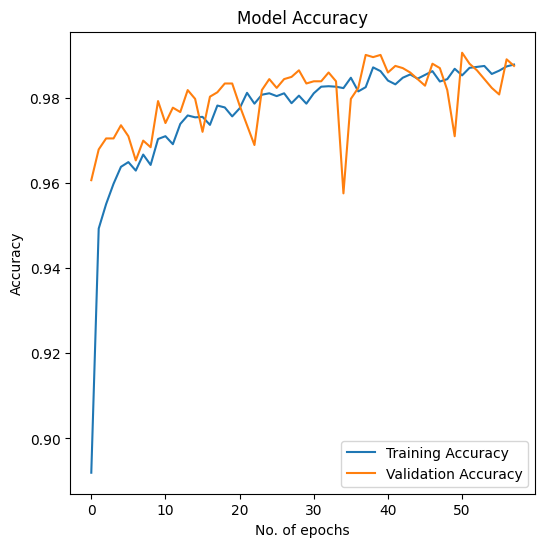

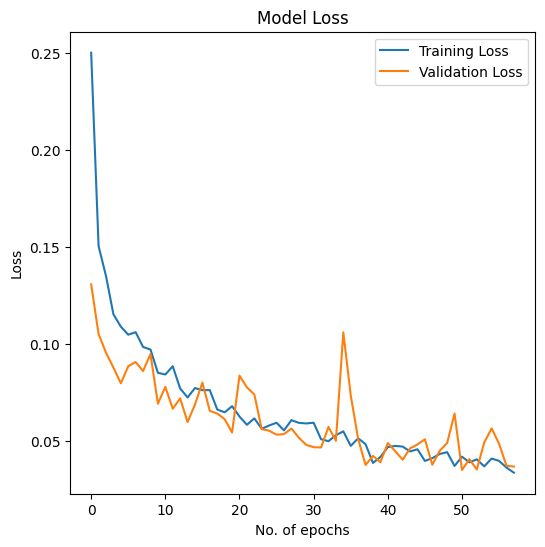

In [25]:
# Plot for model accuracy

plt.figure(figsize=(6, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('No. of epochs')

plt.legend()

plt.show()

# Plot for model loss

plt.figure(figsize=(6, 6))

plt.plot(history.history['loss'], label='Training Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')

plt.ylabel('Loss')

plt.xlabel('No. of epochs')

plt.legend()

plt.show()



Found 1933 images belonging to 2 classes.


C:\Users\ruthvika.miryala\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 396s 6s/step


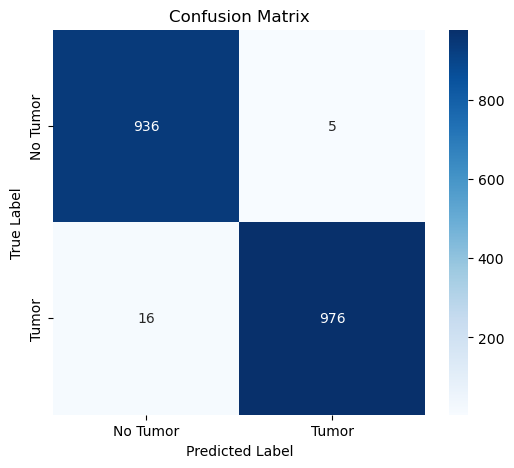

              precision    recall  f1-score   support

    No Tumor       0.98      0.99      0.99       941
       Tumor       0.99      0.98      0.99       992

    accuracy                           0.99      1933
   macro avg       0.99      0.99      0.99      1933
weighted avg       0.99      0.99      0.99      1933



In [1]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns

import matplotlib.pyplot as plt

# Load the trained VGG16 model

model = load_model(r"C:\Users\ruthvika.miryala\OneDrive - Neusix Pvt Ltd\Desktop\Tumor Classification\tumor_model.keras")  # Update with your model path

# Define test data generator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(

    r"C:\Users\ruthvika.miryala\OneDrive - Neusix Pvt Ltd\Desktop\Tumor Classification\test",  # Update with your test dataset path

    target_size=(224, 224),

    batch_size=32,

    class_mode='binary',

    shuffle=False

)

# Get true labels

y_true = test_generator.classes

# Predict labels

y_pred_probs = model.predict(test_generator)

y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute confusion matrix

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.title('Confusion Matrix')

plt.show()

# Print classification report

print(classification_report(y_true, y_pred, target_names=['No Tumor', 'Tumor']))
